<a href="https://colab.research.google.com/github/sajan-sarker/machine-learning/blob/main/linear_regression_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=2)

*****
**Load data from drive**

In [17]:
def load_data():
  data = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/datas/houses.txt", delimiter = ',')
  x = data[1:, :4]  # Select all the rows (except the first) and first 4 columns
  y = data[1:, 4]   # Select all the target values (5tyh column).
  return x, y

In [18]:
X_train, y_train = load_data()
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']

*****
**Scale/normalize the training data**

In [19]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)

print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


*****
**Create and fit the regression model**

In [21]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)

print(sgdr.get_params())
print(f"Number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

{'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_error', 'max_iter': 1000, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Number of iterations completed: 132, number of weight updates: 13069.0


*****
**View parameters**

In [22]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_

print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [110.3  -21.11 -32.53 -38.01], b:[363.17]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


*****
**Make Predictions**

In [24]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)

# make a prediction using w, b
y_pred = np.dot(X_norm, w_norm) + b_norm

print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.19 485.99 389.63 492.15]
Target values 
[300.  509.8 394.  540. ]


*****
**Plot Results**

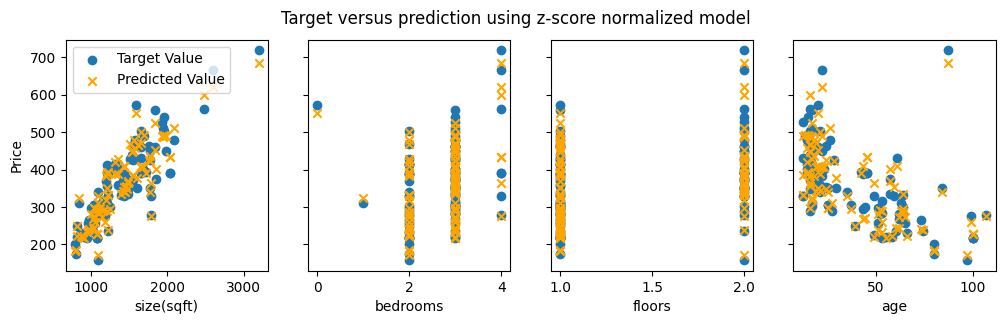

In [30]:
# Plot the prediction and targets vs originals features
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey = True)

for i in range(len(ax)):
  ax[i].scatter(X_train[:,i], y_train, label='Target Value')
  ax[i].set_xlabel(X_features[i])
  ax[i].scatter(X_train[:,i], y_pred, marker = 'x', color = 'orange', label='Predicted Value')

ax[0].set_ylabel("Price")
ax[0].legend()

fig.suptitle("Target versus prediction using z-score normalized model")
plt.show()